In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

In [3]:
import math
import common 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_df = pd.read_csv("./data/train.csv", index_col="Id")
test_df = pd.read_csv("./data/test.csv", index_col="Id")

In [11]:
train_df.shape

(1460, 80)

In [12]:
test_df.shape

(1459, 79)

In [13]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
test_df[test_df['GarageCars'].isna()].loc[2577].index

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [23]:
test_df[test_df['GarageCars'].isna()].loc[2577]['GarageYrBlt']

nan

# Distribution of Target Variable

In [7]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

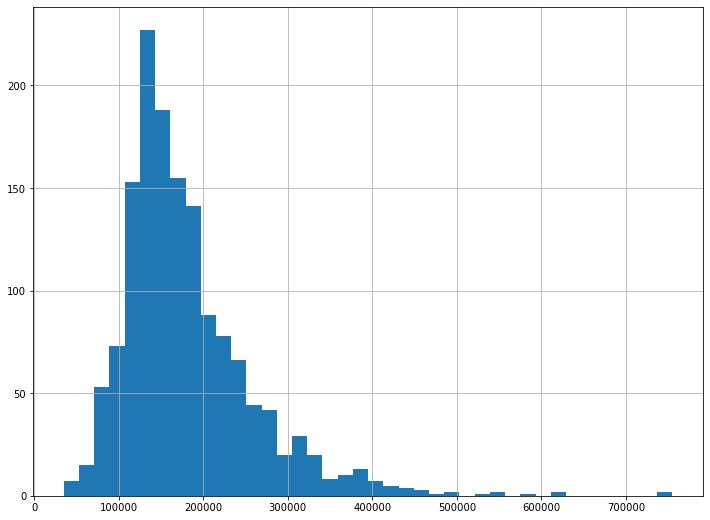

In [10]:
train_df['SalePrice'].hist(bins=40, figsize=(12, 9))

# Corr between continuous features of Target Variable

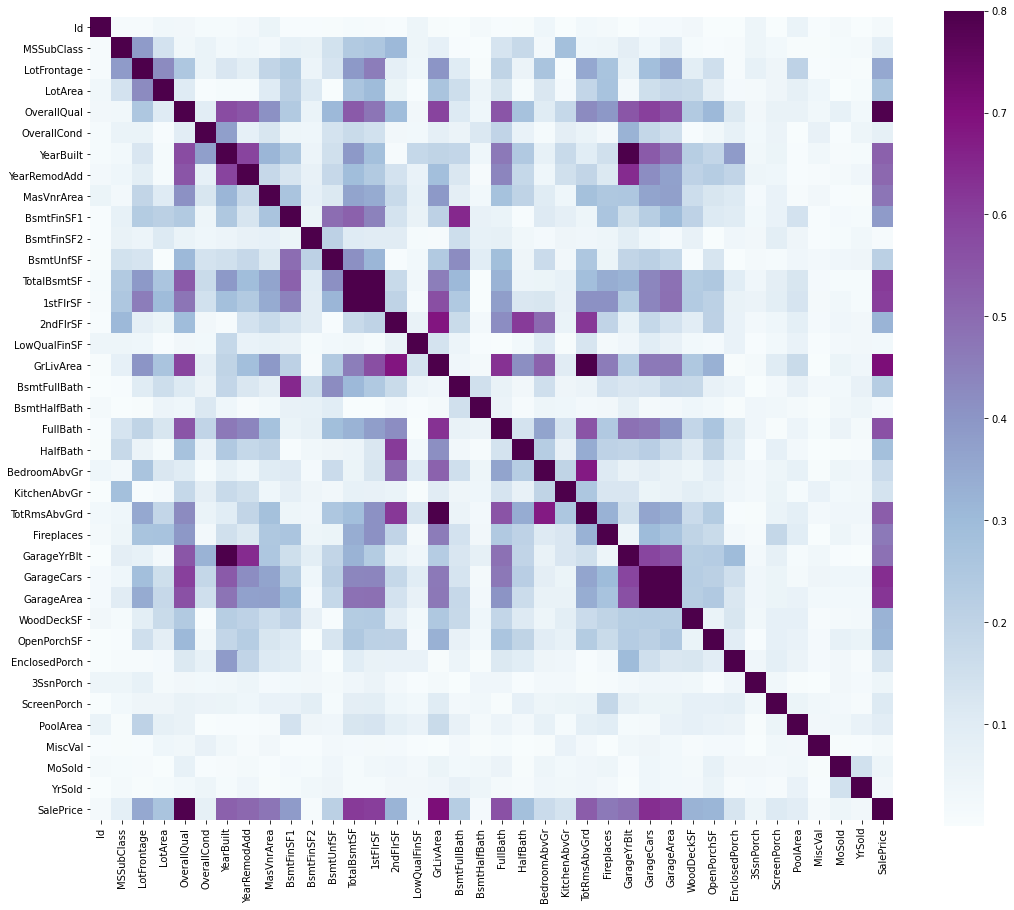

In [52]:
corrmat = train_df.corr()
corrmat_abs = np.abs(corrmat)
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat_abs, vmax=.8, square=True, cmap="BuPu")

In [54]:
corrmat_abs['SalePrice'].sort_values(ascending=False)[:21]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

In [57]:
selected_columns = corrmat_abs['SalePrice'].sort_values(ascending=False)[:21].index
selected_columns = selected_columns[1:]

# Feature Selection using LightGBM which could naturally deal with categorical features

In [52]:
import lightgbm as lgb

In [53]:
train_copy_df = train_df.copy()

In [54]:
model = lgb.LGBMRegressor()

In [55]:
cat_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley',
               'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
               'RoofStyle',
               'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
               'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'BsmtUnfSF',  'Heating', 'HeatingQC',
               'CentralAir', 'Electrical',
               'KitchenQual', 
               'Functional', 'FireplaceQu', 'GarageType', 
               'GarageFinish', 'GarageQual', 'GarageCond',
               'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
               'SaleType', 'SaleCondition']

In [56]:
for fea in cat_features:
    train_copy_df[fea] = train_copy_df[fea].astype('category')
    train_copy_df[fea] = train_copy_df[fea].cat.codes

In [57]:
train_copy_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,5,3,65.0,8450,1,-1,3,3,0,4,...,0,-1,-1,-1,0,2,2008,8,4,208500
2,0,3,80.0,9600,1,-1,3,3,0,2,...,0,-1,-1,-1,0,5,2007,8,4,181500
3,5,3,68.0,11250,1,-1,0,3,0,4,...,0,-1,-1,-1,0,9,2008,8,4,223500
4,6,3,60.0,9550,1,-1,0,3,0,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
5,5,3,84.0,14260,1,-1,0,3,0,2,...,0,-1,-1,-1,0,12,2008,8,4,250000


In [58]:
train_copy_df.dtypes.values

array([dtype('int8'), dtype('int8'), dtype('float64'), dtype('int64'),
       dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('float64'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('int64'), dtype('int8'), dtype('int64'),
       dtype('int16'), dtype('int64'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('int8'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int8'), dtype('int64'), dtype('int8'), dtype('int64'),
       dtype('int8'), dtype('int8')

In [73]:
import random
ll = list(range(10))
random.shuffle(ll)
print(ll)

[8, 5, 2, 7, 9, 3, 4, 1, 0, 6]


In [83]:
import random
ll = list(range(train_copy_df.shape[0]))
random.shuffle(ll)
test_size = int(train_copy_df.shape[0] / 3)
test_index = ll[:test_size]
test_data_set = (train_copy_df[all_features].iloc[test_index], train_copy_df['SalePrice'].iloc[test_index].values)

In [84]:
all_features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [85]:
model.fit(train_copy_df[all_features], train_copy_df['SalePrice'].values, eval_set=test_data_set, categorical_feature=cat_features)

[1]	valid_0's l2: 5.02401e+09
[2]	valid_0's l2: 4.26746e+09
[3]	valid_0's l2: 3.65559e+09
[4]	valid_0's l2: 3.13114e+09
[5]	valid_0's l2: 2.7076e+09
[6]	valid_0's l2: 2.37581e+09
[7]	valid_0's l2: 2.07425e+09
[8]	valid_0's l2: 1.81236e+09
[9]	valid_0's l2: 1.61919e+09
[10]	valid_0's l2: 1.44517e+09
[11]	valid_0's l2: 1.31381e+09
[12]	valid_0's l2: 1.18676e+09
[13]	valid_0's l2: 1.07284e+09
[14]	valid_0's l2: 9.79484e+08
[15]	valid_0's l2: 8.95062e+08
[16]	valid_0's l2: 8.30024e+08
[17]	valid_0's l2: 7.64754e+08
[18]	valid_0's l2: 7.11001e+08
[19]	valid_0's l2: 6.64584e+08
[20]	valid_0's l2: 6.22839e+08
[21]	valid_0's l2: 5.8458e+08
[22]	valid_0's l2: 5.52445e+08
[23]	valid_0's l2: 5.19729e+08
[24]	valid_0's l2: 4.99466e+08
[25]	valid_0's l2: 4.82177e+08
[26]	valid_0's l2: 4.60492e+08
[27]	valid_0's l2: 4.47404e+08
[28]	valid_0's l2: 4.29368e+08
[29]	valid_0's l2: 4.18596e+08
[30]	valid_0's l2: 4.04015e+08
[31]	valid_0's l2: 3.95734e+08
[32]	valid_0's l2: 3.86565e+08
[33]	valid_0's l2: 

LGBMRegressor()

In [86]:
predictions = model.predict(train_copy_df[all_features]).astype('int')

In [87]:
for x, y in zip(predictions[:5], train_copy_df['SalePrice'].values[:5]):
    print({"true_price": y, "predicted_price": x})

{'true_price': 208500, 'predicted_price': 205494}
{'true_price': 181500, 'predicted_price': 182299}
{'true_price': 223500, 'predicted_price': 218137}
{'true_price': 140000, 'predicted_price': 151950}
{'true_price': 250000, 'predicted_price': 265743}


In [88]:
model.feature_name_

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [93]:
selected_features = []
for x, y in sorted(zip(model.feature_importances_, model.feature_name_), reverse=True)[:25]:
    print({"feature": y, "score": x, "cate?": y in cat_features})
    selected_features.append(y)

{'feature': 'GrLivArea', 'score': 297, 'cate?': False}
{'feature': 'TotalBsmtSF', 'score': 231, 'cate?': False}
{'feature': 'LotArea', 'score': 214, 'cate?': False}
{'feature': 'BsmtFinSF1', 'score': 190, 'cate?': False}
{'feature': '1stFlrSF', 'score': 166, 'cate?': False}
{'feature': 'GarageArea', 'score': 164, 'cate?': False}
{'feature': 'LotFrontage', 'score': 148, 'cate?': False}
{'feature': 'MasVnrArea', 'score': 144, 'cate?': False}
{'feature': 'OpenPorchSF', 'score': 138, 'cate?': False}
{'feature': 'Neighborhood', 'score': 114, 'cate?': True}
{'feature': 'GarageYrBlt', 'score': 107, 'cate?': False}
{'feature': 'YearBuilt', 'score': 94, 'cate?': False}
{'feature': 'YearRemodAdd', 'score': 90, 'cate?': False}
{'feature': '2ndFlrSF', 'score': 90, 'cate?': False}
{'feature': 'OverallQual', 'score': 85, 'cate?': False}
{'feature': 'OverallCond', 'score': 83, 'cate?': False}
{'feature': 'WoodDeckSF', 'score': 70, 'cate?': False}
{'feature': 'MoSold', 'score': 70, 'cate?': False}
{'f

In [94]:
selected_features

['GrLivArea',
 'TotalBsmtSF',
 'LotArea',
 'BsmtFinSF1',
 '1stFlrSF',
 'GarageArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'Neighborhood',
 'GarageYrBlt',
 'YearBuilt',
 'YearRemodAdd',
 '2ndFlrSF',
 'OverallQual',
 'OverallCond',
 'WoodDeckSF',
 'MoSold',
 'YrSold',
 'GarageFinish',
 'BedroomAbvGr',
 'ExterQual',
 'Exterior1st',
 'TotRmsAbvGrd',
 'EnclosedPorch']

In [ ]:
# GarageYrBlt, MasVnrArea and LotFrontage are not used due to missing values

In [65]:
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
        'Fireplaces', 'BsmtFinSF1', 
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea']

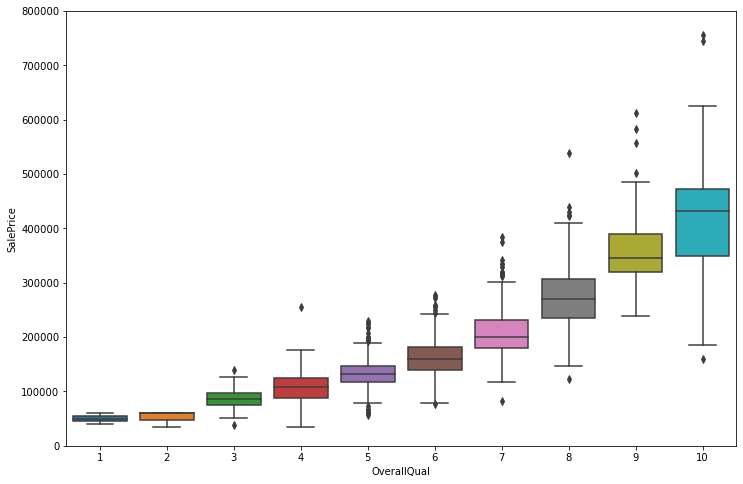

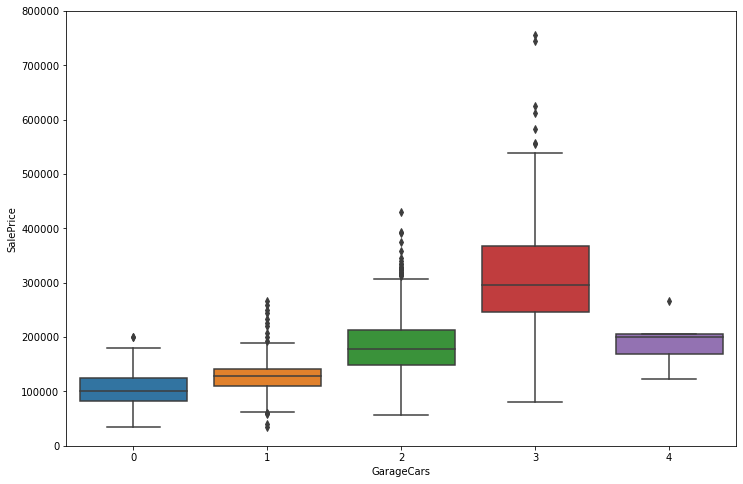

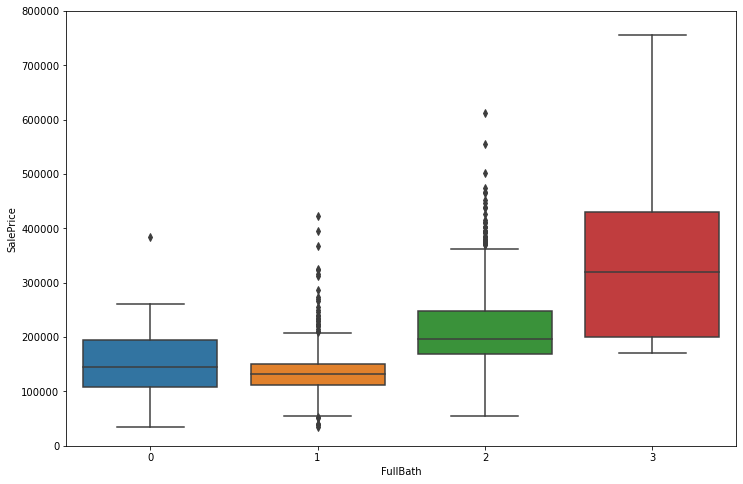

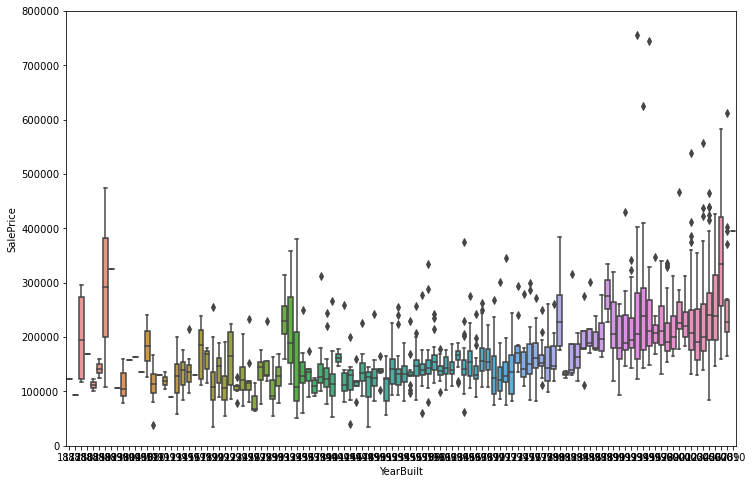

In [60]:
#scatter plot grlivarea/saleprice
for var in ['OverallQual', 'GarageCars', 'FullBath', 'YearBuilt']:
    data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
    f, ax = plt.subplots(figsize=(12, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

In [64]:
train_df[selected_columns].apply(lambda x: x.isna().sum())

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
dtype: int64

In [62]:
train_df.shape

(1460, 81)

In [66]:
test_df[selected_columns].apply(lambda x: x.isna().sum())

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
BsmtFinSF1      1
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
dtype: int64

In [70]:
test_df[test_df['GarageCars'].isna()][selected_columns]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
1116,5,1828,NaN,NaN,859.0,942,2,6,1923,1999,0,548.0,174,886,0,0,9060


In [73]:
test_df[test_df['YearBuilt'] == 1923]['GarageCars'].median()

1.0